<a href="https://colab.research.google.com/github/Priyo-prog/Deep-Learning-with-Tensorflow/blob/main/Neural%20Network%20Classification%20with%20Tensorflow/Neural_Network_Classification_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Session 1

## Import packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Create the dataset

In [3]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# Check out the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

## Visualize the data

In [6]:
# Create the dataframe for the data

circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "labels":y})
circles

,X0,X1,labels
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


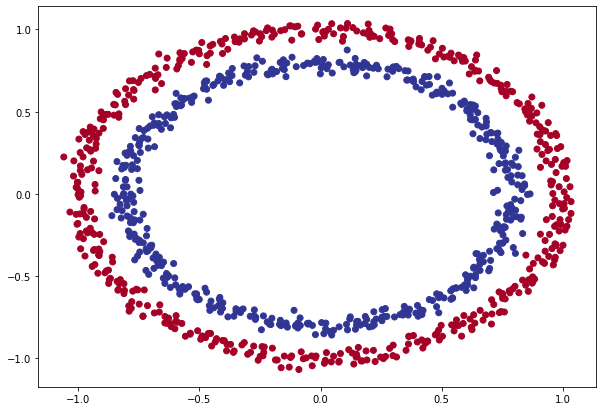

In [7]:
# Visualize the data with a plot
plt.figure(figsize=(10,7))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

## Input and output shapes


In [8]:
X.shape, y.shape, X.ndim, y.ndim

((1000, 2), (1000,), 2, 1)

In [9]:
# How many samples we are working
len(X), len(y)

(1000, 1000)

In [10]:
# Check out the first sample of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Split the data into train and test split

In [11]:
X_train,y_train = X[:800], y[:800]

X_test, y_test = X[800:], y[800:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

## Build the model

In [12]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model = tf.keras.Sequential([
 tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
 tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
 tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

# 3. Fit the model
history = model.fit(X_train, y_train, epochs=100, verbose=0)

# 4. Evaluate the model
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.5627 - accuracy: 0.7450


[0.5626760721206665, 0.7450000047683716]

## Plot decision boundary

Doing binary classification


(-1.1677683182718437, 1.1360036756154805)

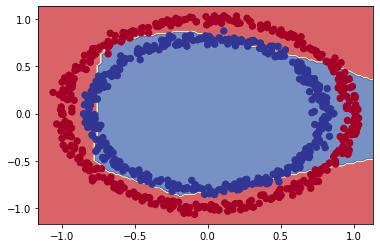

In [23]:
"""
Plot a decision boundary created by a model predicting on X
"""

# Define the axis boundaries of the plot and create a meshgrid
x_min, x_max = X_train[:,0].min() - 0.1, X_train[:,0].max() + 0.1
y_min, y_max = X_train[:,1].min() - 0.1, X_train[:,1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max,100),
                     np.linspace(y_min,y_max,100))

# Create X values (we are going to predict on these)
x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

# Make predictions
y_pred = model.predict(x_in)

# Check for multiclass-classification
if len(y_pred[0]) > 1:
  print("Doing multi-class classification")
  # We have to reshape our prediction to get them ready for plotting
  y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
else:
  print("Doing binary classification")
  y_pred = np.round(y_pred).reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu, alpha=0.7)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, s=40, cmap=plt.cm.RdYlBu)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())